<a href="https://colab.research.google.com/github/makxxic/NOTEBOOKS/blob/main/Stage2Task3Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries and Load Data

This section imports necessary Python libraries such as pandas for data manipulation, numpy for numerical operations, and matplotlib for plotting. It then defines the Google Sheet ID and constructs a URL to load the dataset directly into a pandas DataFrame. A `try-except` block is used to handle potential errors during data loading and to display the first few rows of the DataFrame upon successful loading.

In [7]:
import pandas as pd # Import the pandas library for data manipulation and analysis
import numpy as np # Import the numpy library for numerical operations, especially with arrays
import matplotlib.pyplot as plt # Import the matplotlib.pyplot library for creating static, interactive, and animated visualizations

# Define the Google Sheet ID
google_sheet_id = '1fUWevh79VD3-8YzCZU-uUC1_LJfif5Y7_eX9dkUOe_o'
# Construct the URL to export the Google Sheet as a CSV file
url = f'https://docs.google.com/spreadsheets/d/{google_sheet_id}/export?format=csv'

# Load the dataset from the constructed URL into a pandas DataFrame
try:
    df = pd.read_csv(url) # Attempt to read the CSV data from the URL
    print("Google Sheet data loaded successfully!") # Print a success message if loading is successful
    display(df.head()) # Display the first 5 rows of the DataFrame to inspect the data
except Exception as e:
    print(f"Error loading Google Sheet: {e}") # Print an error message if loading fails

Google Sheet data loaded successfully!


,x1,x2,x3,label
0,-0.332727,-0.696181,-0.286767,0
1,-1.510220,-1.375861,-1.197257,0
2,-1.256076,-1.228764,-1.785996,0
3,-0.772276,-0.409598,-0.267973,0
4,-1.346263,0.112805,0.612268,0


### Step 2: Prepare Data (Feature Extraction and Normalization)

In this step, the features (independent variables `X`) and the target variable (`Y`) are extracted from the loaded DataFrame. The first three columns are used as features, and the fourth column is set as the target. To improve the performance and convergence of the logistic regression model, feature normalization (standardization) is applied to `X` by subtracting the mean and dividing by the standard deviation. Finally, the shapes of the processed `X` and `Y` are printed to verify the data dimensions.

In [8]:
# Extract features (independent variables) from the DataFrame
X = df.iloc[:, :3].values  # Select all rows and the first three columns, then convert to a NumPy array
# Extract the target variable (dependent variable) from the DataFrame
Y = df.iloc[:, 3].values.reshape(-1, 1)  # Select all rows and the fourth column, reshape to a column vector

# Feature normalization (standardization)
X_mean = X.mean(axis=0) # Calculate the mean of each feature column
X_std = X.std(axis=0) # Calculate the standard deviation of each feature column
X = (X - X_mean) / X_std # Apply standardization: (value - mean) / standard deviation

print("Shapes — X:", X.shape, " Y:", Y.shape) # Print the shapes of the feature matrix (X) and target vector (Y)

Shapes — X: (200, 3)  Y: (200, 1)


### Step 3: Define Activation and Loss Functions

This section defines two crucial functions for the logistic regression model: the sigmoid activation function and the binary cross-entropy loss function. The `sigmoid` function transforms the linear output of the model into a probability between 0 and 1. The `compute_loss` function calculates the binary cross-entropy, which quantifies the error between the predicted probabilities and the actual target values, serving as the objective function for optimization.

In [9]:
def sigmoid(z): # Define the sigmoid activation function
    return 1 / (1 + np.exp(-z)) # Calculate 1 / (1 + e^(-z))

def compute_loss(Y, P): # Define the binary cross-entropy loss function
    m = len(Y) # Get the number of samples (m)
    # Calculate the binary cross-entropy loss: -(1/m) * sum(y*log(p) + (1-y)*log(1-p))
    # Add a small epsilon (1e-8) to log arguments to prevent log(0) errors
    return -(1/m) * np.sum(Y*np.log(P + 1e-8) + (1-Y)*np.log(1-P + 1e-8))

### Step 4: Initialize Parameters and Run Gradient Descent

Here, the model's parameters (weights `W` and bias `c`) are initialized, and hyperparameters for the gradient descent optimization algorithm, such as the learning rate (`alpha`) and the number of training epochs, are set. The code then enters a loop that performs forward propagation to calculate predictions, computes the loss, and then uses the gradients of the loss with respect to the parameters to update `W` and `c` iteratively. The loss is tracked over epochs to monitor convergence, and the final learned parameters are printed.

In [10]:
# Initialize parameters (weights and bias)
m1, m2, m3 = 0.0, 0.0, 0.0 # Initialize weights for the three features to zero
c = 0.0 # Initialize the bias term to zero

# Combine individual weights into a NumPy array (column vector)
W = np.array([[m1], [m2], [m3]])

# Define hyperparameters for gradient descent
alpha = 0.05        # learning rate: controls the step size during parameter updates
epochs = 2000 # number of iterations (epochs) for gradient descent
m = len(Y) # number of training examples (from the length of the target vector)

cost_history = [] # List to store the cost (loss) at each epoch for plotting

for epoch in range(epochs):

    # Forward pass: calculate predicted probabilities
    Z = X @ W + c # Calculate the linear combination (XW + c)
    P = sigmoid(Z) # Apply the sigmoid function to get probabilities (P)

    # Compute and store the loss
    cost = compute_loss(Y, P) # Calculate the binary cross-entropy loss
    cost_history.append(cost) # Add the current cost to the history list

    # Print loss every 100 epochs to monitor training progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch} — Loss: {cost:.6f}")

    # Calculate gradients of the loss with respect to weights (dW) and bias (dc)
    dW = (1/m) * (X.T @ (P - Y)) # Gradient for weights: (1/m) * X_transpose * (P - Y)
    dc = (1/m) * np.sum(P - Y) # Gradient for bias: (1/m) * sum(P - Y)

    # Update parameters using gradient descent
    W -= alpha * dW # Update weights: W = W - learning_rate * dW
    c -= alpha * dc # Update bias: c = c - learning_rate * dc

# Extract final weight values from the W vector
m1, m2, m3 = W.flatten() # Flatten the W array to get scalar values
print("\nTraining Complete!") # Indicate that training has finished
# Print the final learned parameters, formatted to 4 decimal places
print(f"Final m1 = {m1:.4f}")
print(f"Final m2 = {m2:.4f}")
print(f"Final m3 = {m3:.4f}")
print(f"Final c  = {c:.4f}")

Epoch 0 — Loss: 0.693147
Epoch 100 — Loss: 0.452056
Epoch 200 — Loss: 0.387650
Epoch 300 — Loss: 0.345986
Epoch 400 — Loss: 0.315695
Epoch 500 — Loss: 0.292492
Epoch 600 — Loss: 0.274073
Epoch 700 — Loss: 0.259045
Epoch 800 — Loss: 0.246512
Epoch 900 — Loss: 0.235866
Epoch 1000 — Loss: 0.226686
Epoch 1100 — Loss: 0.218669
Epoch 1200 — Loss: 0.211590
Epoch 1300 — Loss: 0.205280
Epoch 1400 — Loss: 0.199610
Epoch 1500 — Loss: 0.194478
Epoch 1600 — Loss: 0.189803
Epoch 1700 — Loss: 0.185522
Epoch 1800 — Loss: 0.181581
Epoch 1900 — Loss: 0.177936

Training Complete!
Final m1 = 4.2294
Final m2 = -2.8099
Final m3 = 1.7820
Final c  = -0.8696


### Step 5: Visualize the Cost Function

This section generates a plot to visualize the reduction of the binary cross-entropy loss over the training epochs. A decreasing trend in the `cost_history` indicates that the gradient descent algorithm is effectively minimizing the loss function and the model is learning. The plot helps to assess the convergence of the training process.

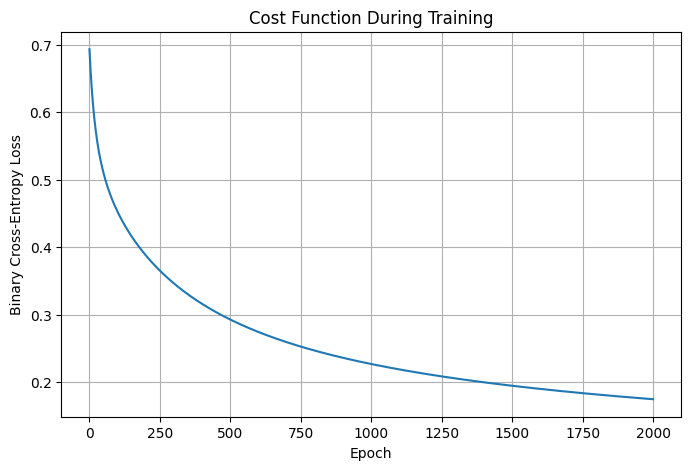

In [11]:
plt.figure(figsize=(8,5)) # Create a new figure with a specified size (width=8, height=5 inches)
plt.plot(cost_history) # Plot the `cost_history` list, which contains the loss values over epochs
plt.title("Cost Function During Training") # Set the title of the plot
plt.xlabel("Epoch") # Set the label for the x-axis
plt.ylabel("Binary Cross-Entropy Loss") # Set the label for the y-axis
plt.grid(True) # Add a grid to the plot for better readability
plt.show() # Display the plot

### Step 6: Visualize Actual vs. Predicted Probabilities

This final step creates a scatter plot comparing the actual target values (`Y`) with the predicted probabilities (`P`) generated by the trained logistic regression model. This visualization helps to understand how well the model's predictions align with the true outcomes. Ideally, for a well-performing binary classifier, predicted probabilities for class 0 would cluster near 0, and for class 1, they would cluster near 1.

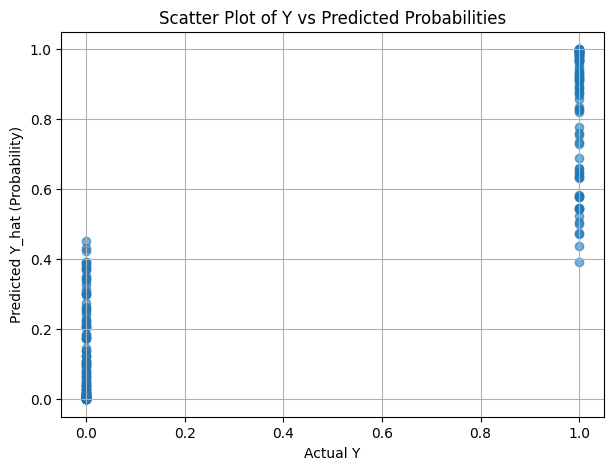

In [12]:
plt.figure(figsize=(7,5)) # Create a new figure with a specified size (width=7, height=5 inches)
plt.scatter(Y, P, alpha=0.6) # Create a scatter plot with actual labels (Y) on the x-axis and predicted probabilities (P) on the y-axis.
                            # `alpha=0.6` sets the transparency of the points.
plt.xlabel("Actual Y") # Set the label for the x-axis
plt.ylabel("Predicted Y_hat (Probability)") # Set the label for the y-axis
plt.title("Scatter Plot of Y vs Predicted Probabilities") # Set the title of the plot
plt.grid(True) # Add a grid to the plot for better readability
plt.show() # Display the plot